In [1]:
#Import Packages
import pandas as pd
import xml.etree.ElementTree as ET
import re
import os
import matplotlib.pyplot as plt
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud

In [2]:
#Convert data from xml to csv for easier use
for i in os.listdir("./xml"):
     if i[-3] == 'x':
        rows = []
        tree = ET.parse(f"./xml/{i}").getroot()

        for row in tree.findall('row'):
            rows.append(row.attrib)

        df = pd.DataFrame(rows)

        df.to_csv(f"./Csv/{i}.csv")

In [2]:
#Get the body of each post and clean it
df = pd.read_csv('./Csv/Posts.xml.csv')

df['Body'] = df['Body'].fillna('')

for i in range(len(df)):
    df.loc[i, 'Body'] = re.sub('<.*?>', '', df.loc[i, 'Body'])

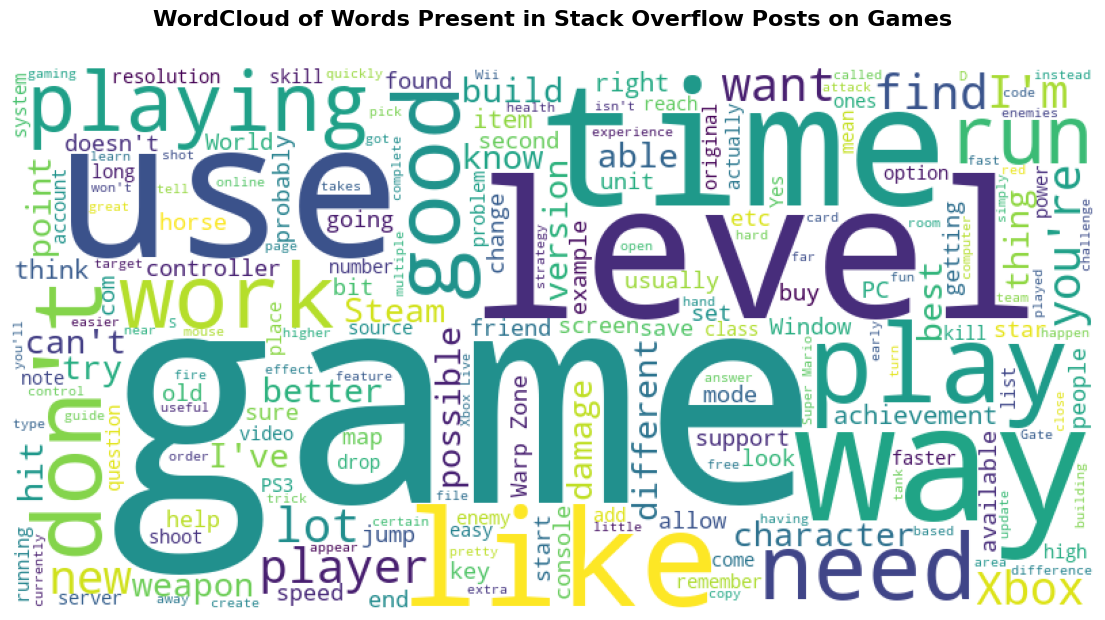

In [4]:
#Remove unmeaningful words and create wordcloud

stopwordss = spacy.lang.en.stop_words.STOP_WORDS
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=stopwordss).generate(' '.join(df['Body'][:1000]))
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WordCloud of Words Present in Stack Overflow Posts on Games", fontsize=16, fontweight='bold', pad=30)
plt.show()

In [3]:
#Get the tags for each post (this usually contains the game that post is about)

df['Split_Tags'] = df['Tags'].str.split('|')
df = df.dropna(subset=['Split_Tags'])

Games = []
for G_list in df['Split_Tags']:
    for game in G_list:
            Games.append(game)

games_df = pd.DataFrame({
    'Game': pd.Series(Games).value_counts().index,
    'Count': pd.Series(Games).value_counts().values
})

#Remove first row (nulls)
games_df = games_df[1:]

#Show the top 20 tags
games_df.head(40)

,Game,Count
1,minecraft-java-edition,13433
2,minecraft-commands,5132
3,the-elder-scrolls-v-skyrim,4382
4,steam,2745
5,diablo-iii,2653
6,minecraft-bedrock-edition,2385
7,league-of-legends,2161
8,technical-issues,2057
9,pokemon-go,1812
10,starcraft-2,1597


Looking through this list of the top 40 most tagged games on stack overflow we find many of the most popular games in the world. One of the most interesting observations I made is that games that require more development are more popular on stack overflow. This may seem like an obvious insight looking back, it likely would not have been the first thing that came to mind if I had to guess which games I thought would be the highest on the list. For example, a game like minecraft is extremely popular but it takes 5 of the top 40 spots. As someone who has been in the minecraft community this couldn't make more sense. From thousands of in-game mechanics with redstone, to coding your own custom mods, texture packs, plugins, and game modes there is no game that would require more coding/engineering skills than minecraft. On the other hand, a game such as fortnite while only being around since 2017 (minecraft has been around since 2009) is currently a much more popular game. However, we can see that fortnite does not even make the top 40. While at first this may not make much sense, the amount of developing done in fortnite is just so much less. While you can create your own fortnite creative map, only a small portion of the community does this and it's much simpler than creating your own minecraft mod. While this observation may not hold up for the whole list as I don't know many of these games very well, it definitely has a large impact on this list. 

Another interesting thing to compare to this list is the games with the most sales. I will compare the top 10 selling games of all time with where they rank in my list. It is important to note that these are games that you have to buy. This means many of the most popular games today that are free to play (usually with purchasable cosmetics) are not on this list. Some examples of these free-to-play games that are not on this list include: Fortnite, Valorant, Apex Legends, CS2, Roblox, Overwatch, and Rocket League to name a few. To simplify the rankings I am just going to use the ranking of the top instance of the game since games like minecraft have 64 different tags.

In [66]:
#How many times does minecraft show up in the list?
print(f"Minecraft shows up in {len(games_df[games_df['Game'].str.contains('minecraft')])} different tags")

#Add a space
print()

#How many different tags are there?
print(f"There are {len(games_df)} different tags")

Minecraft shows up in 64 different tags

There are 6257 different tags


In [60]:
#Search the games for a specific game
games_df[games_df["Game"].str.contains("mario")]

,Game,Count
222,mario-kart-8,86
282,super-mario-odyssey,63
363,mario-kart-wii,46
404,super-mario-bros,41
450,super-mario-maker,35
...,...,...
5827,mario-and-luigi-superstar-saga,1
6042,mario-party-ds,1
6212,mario-golf-world-tour,1
6214,mario-party-7,1


In [49]:
#Create a dataframe that has each of the top 10 games in terms of sales and their corresponding stack overflow rank

sales_name = ["Minecraft", "GTA 5", "Tetris", "Wii Sport", "PUBG", "Mario Kart", "Super Mario Bros", "Red Dead Redemption 2", "Pokemon", "Terraria"]
sales = [238, 175, 100, 82.9, 75, 60.5, 58, 50, 47.5, 44.5]
rankings = [1, 28, 772, 1042, 190, 222, 404, 186, 9, 22]


sales_df = pd.DataFrame({
    'Game': sales_name,
    'Sales Rank': [1,2,3,4,5,6,7,8,9,10],
    'Sales (Millions USD)': sales,
    'Stack Overflow Rank': rankings
})

sales_df

,Game,Sales Rank,Sales (Millions USD),Stack Overflow Rank
0,Minecraft,1,238.0,1
1,GTA 5,2,175.0,28
2,Tetris,3,100.0,772
3,Wii Sport,4,82.9,1042
4,PUBG,5,75.0,190
5,Mario Kart,6,60.5,222
6,Super Mario Bros,7,58.0,404
7,Red Dead Redemption 2,8,50.0,186
8,Pokemon,9,47.5,9
9,Terraria,10,44.5,22


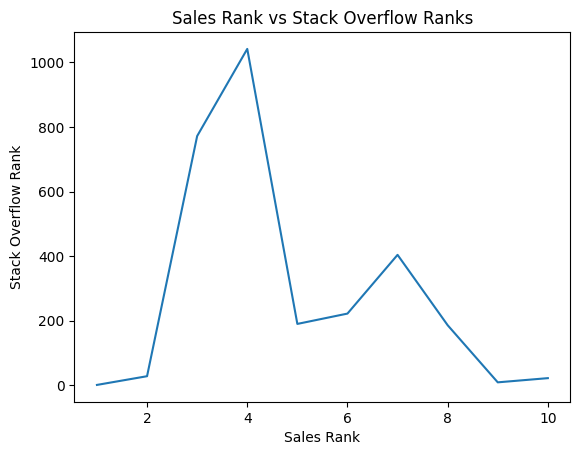

In [ ]:
#Plot Sales vs stack overflow rank

plt.plot(sales_df["Sales Rank"], sales_df['Stack Overflow Rank'])
plt.xlabel("Sales Rank")
plt.ylabel("Stack Overflow Rank")
plt.title("Sales Rank vs Stack Overflow Ranks")
plt.show()

Inspecting the graph we do not see a clear correlation between the amount of sales a game has and the stack overflow rank of the tag. However a more nuanced look would show that a tag ranked 1000th is still in the top 20% of tags. So while there does not seem to be a 1 to 1 correlation it is likely that the more sales a game has the more likely it is to be referenced in a stack overflow post. 

## Sources

- **Data** https://archive.org/details/stackexchange\
- **Games Sales Data** https://scoop.market.us/video-games-statistics/